<a href="https://colab.research.google.com/github/naenae4796/copilot-codespaces-vscode/blob/main/CSCI_164_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Song and Student Success using Machine Learning

## Project Goals
- Predict song popularity (Spotify)
- Predict student grades (UCI dataset)

## Methods
- Regression and Classification
- Models: Logistic/Linear Regression, k-NN, MLP
- Validation: Train/Test Split and Cross-validation

In [1]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,
                             mean_squared_error, mean_absolute_error, r2_score, ConfusionMatrixDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt

In [2]:
# --- SPOTIFY DATASET ---
# Load your filtered dataset here
# Example: spotify_df = pd.read_csv('spotify_black_women.csv')
# For now, let's mock it up:
spotify_df = pd.DataFrame({
    'danceability': np.random.rand(200),
    'energy': np.random.rand(200),
    'loudness': np.random.rand(200)*-10,
    'speechiness': np.random.rand(200),
    'acousticness': np.random.rand(200),
    'instrumentalness': np.random.rand(200),
    'liveness': np.random.rand(200),
    'valence': np.random.rand(200),
    'tempo': np.random.rand(200)*200,
    'duration_ms': np.random.randint(180000, 300000, 200),
    'popularity': np.random.randint(40, 100, 200)
})

In [3]:
# --- Preprocessing Spotify ---
spotify_df['hit'] = (spotify_df['popularity'] >= 70).astype(int)
features_spotify = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]
X_spotify = spotify_df[features_spotify]

# Normalize features
scaler = StandardScaler()
X_spotify_scaled = scaler.fit_transform(X_spotify)

# Targets
y_spotify_reg = spotify_df['popularity']
y_spotify_clf = spotify_df['hit']

# Split
X_train_s_r, X_test_s_r, y_train_s_r, y_test_s_r = train_test_split(X_spotify_scaled, y_spotify_reg, test_size=0.2, random_state=42)
X_train_s_c, X_test_s_c, y_train_s_c, y_test_s_c = train_test_split(X_spotify_scaled, y_spotify_clf, test_size=0.2, random_state=42)

In [4]:
# --- STUDENT DATASET ---
# Load dataset
# Example: student_df = pd.read_csv('student-por.csv')
# Mockup:
student_df = pd.DataFrame({
    'sex': np.random.choice(['M', 'F'], 300),
    'age': np.random.randint(15, 22, 300),
    'address': np.random.choice(['U', 'R'], 300),
    'famsize': np.random.choice(['LE3', 'GT3'], 300),
    'studytime': np.random.randint(1, 5, 300),
    'failures': np.random.randint(0, 4, 300),
    'absences': np.random.randint(0, 30, 300),
    'goout': np.random.randint(1, 6, 300),
    'Dalc': np.random.randint(1, 6, 300),
    'Walc': np.random.randint(1, 6, 300),
    'freetime': np.random.randint(1, 6, 300),
    'famrel': np.random.randint(1, 6, 300),
    'G3': np.random.randint(0, 20, 300)
})

In [5]:
# Preprocessing Student
student_df['pass'] = (student_df['G3'] >= 10).astype(int)

# Features
X_student = student_df.drop(columns=['G3', 'pass'])
cat_features = ['sex', 'address', 'famsize']
num_features = [c for c in X_student.columns if c not in cat_features]

# Pipelines
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

X_student_processed = preprocessor.fit_transform(X_student)
y_student_reg = student_df['G3']
y_student_clf = student_df['pass']

# Split
X_train_st_r, X_test_st_r, y_train_st_r, y_test_st_r = train_test_split(X_student_processed, y_student_reg, test_size=0.2, random_state=42)
X_train_st_c, X_test_st_c, y_train_st_c, y_test_st_c = train_test_split(X_student_processed, y_student_clf, test_size=0.2, random_state=42)

In [6]:
# Preprocessing Student
student_df['pass'] = (student_df['G3'] >= 10).astype(int)

# Features
X_student = student_df.drop(columns=['G3', 'pass'])
cat_features = ['sex', 'address', 'famsize']
num_features = [c for c in X_student.columns if c not in cat_features]

# Pipelines
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

X_student_processed = preprocessor.fit_transform(X_student)
y_student_reg = student_df['G3']
y_student_clf = student_df['pass']

# Split
X_train_st_r, X_test_st_r, y_train_st_r, y_test_st_r = train_test_split(X_student_processed, y_student_reg, test_size=0.2, random_state=42)
X_train_st_c, X_test_st_c, y_train_st_c, y_test_st_c = train_test_split(X_student_processed, y_student_clf, test_size=0.2, random_state=42)

In [7]:
# --- MODELING AND EVALUATION ---

# Function for evaluating classifiers
def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()

# Function for evaluating regressors
def evaluate_regressor(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))


=== Spotify Classification: Logistic Regression ===
Accuracy: 0.475
Precision: 0.5714285714285714
Recall: 0.18181818181818182
F1 Score: 0.27586206896551724


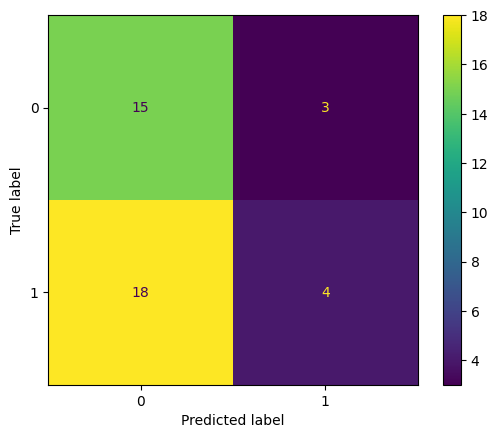


=== Spotify Classification: k-NN Classifier ===
Accuracy: 0.625
Precision: 0.7333333333333333
Recall: 0.5
F1 Score: 0.5945945945945946


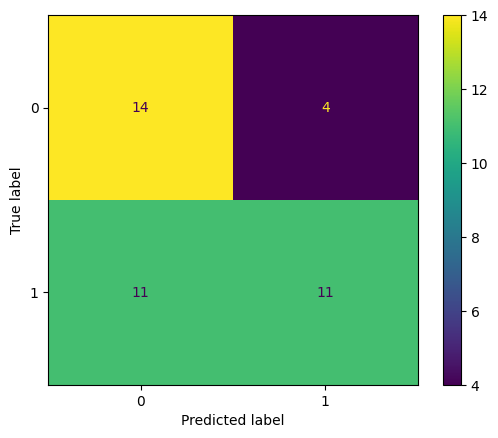


=== Spotify Classification: MLP Classifier ===


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.525
Precision: 0.6666666666666666
Recall: 0.2727272727272727
F1 Score: 0.3870967741935484


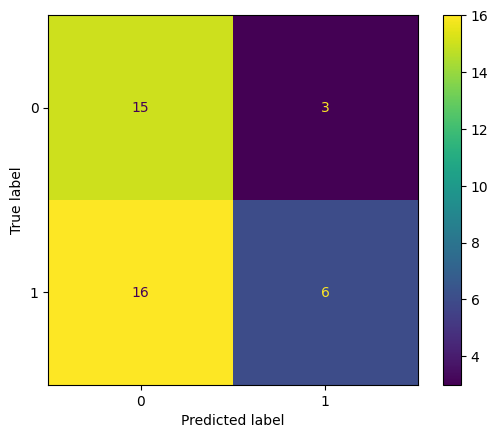

In [8]:
# --- SPOTIFY CLASSIFICATION MODELS ---
print("\n=== Spotify Classification: Logistic Regression ===")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_s_c, y_train_s_c)
evaluate_classifier(logreg, X_test_s_c, y_test_s_c)

print("\n=== Spotify Classification: k-NN Classifier ===")
knn_c = KNeighborsClassifier(n_neighbors=5)
knn_c.fit(X_train_s_c, y_train_s_c)
evaluate_classifier(knn_c, X_test_s_c, y_test_s_c)

print("\n=== Spotify Classification: MLP Classifier ===")
mlp_c = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
mlp_c.fit(X_train_s_c, y_train_s_c)
evaluate_classifier(mlp_c, X_test_s_c, y_test_s_c)

Best parameters for k-NN Classifier: {'n_neighbors': 3}
Accuracy: 0.625
Precision: 0.7333333333333333
Recall: 0.5
F1 Score: 0.5945945945945946


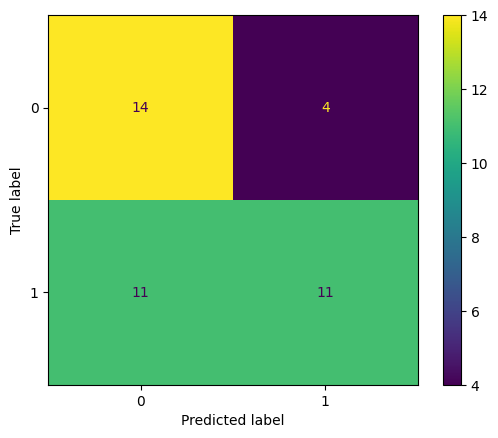

In [9]:
# --- k-NN Classifier tuning ---
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_s_c, y_train_s_c)

print("Best parameters for k-NN Classifier:", grid_knn.best_params_)

# Evaluate best model
evaluate_classifier(grid_knn.best_estimator_, X_test_s_c, y_test_s_c)

In [11]:
# --- SPOTIFY REGRESSION MODELS ---
print("\n=== Spotify Regression: Linear Regression ===")
linreg = LinearRegression()
linreg.fit(X_train_s_r, y_train_s_r)
evaluate_regressor(linreg, X_test_s_r, y_test_s_r)

print("\n=== Spotify Regression: k-NN Regressor ===")
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_train_s_r, y_train_s_r)
evaluate_regressor(knn_r, X_test_s_r, y_test_s_r)

print("\n=== Spotify Regression: MLP Regressor ===")
mlp_r = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500)
mlp_r.fit(X_train_s_r, y_train_s_r)
evaluate_regressor(mlp_r, X_test_s_r, y_test_s_r)


=== Spotify Regression: Linear Regression ===
MSE: 315.47243817049196
RMSE: 17.76154380031454
MAE: 14.952070716785197
R2 Score: -0.04895241286946628

=== Spotify Regression: k-NN Regressor ===
MSE: 398.871
RMSE: 19.971755055577866
MAE: 16.115
R2 Score: -0.3262543640897755

=== Spotify Regression: MLP Regressor ===
MSE: 1733.9827381948944
RMSE: 41.64111835907982
MAE: 37.84793141730712
R2 Score: -4.765528639052018


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# --- k-NN Regressor tuning ---
param_grid_knn_reg = {'n_neighbors': [3, 5, 7, 9]}
grid_knn_r = GridSearchCV(KNeighborsRegressor(), param_grid_knn_reg, cv=5)
grid_knn_r.fit(X_train_s_r, y_train_s_r)

print("Best parameters for k-NN Regressor:", grid_knn_r.best_params_)

evaluate_regressor(grid_knn_r.best_estimator_, X_test_s_r, y_test_s_r)

Best parameters for k-NN Regressor: {'n_neighbors': 7}
MSE: 341.35255102040816
RMSE: 18.475728700660447
MAE: 15.232142857142856
R2 Score: -0.13500432591989409



=== Student Classification: Logistic Regression ===
Accuracy: 0.43333333333333335
Precision: 0.5
Recall: 0.5
F1 Score: 0.5


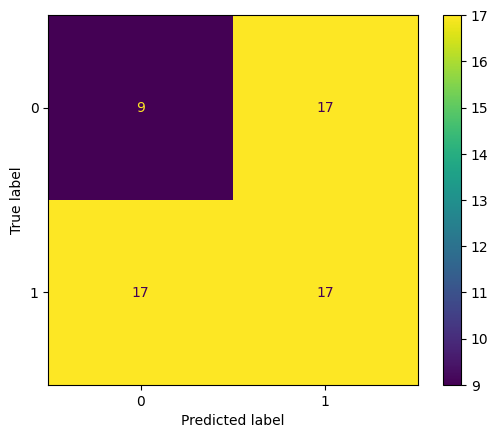


=== Student Classification: k-NN Classifier ===
Accuracy: 0.5166666666666667
Precision: 0.5714285714285714
Recall: 0.5882352941176471
F1 Score: 0.5797101449275363


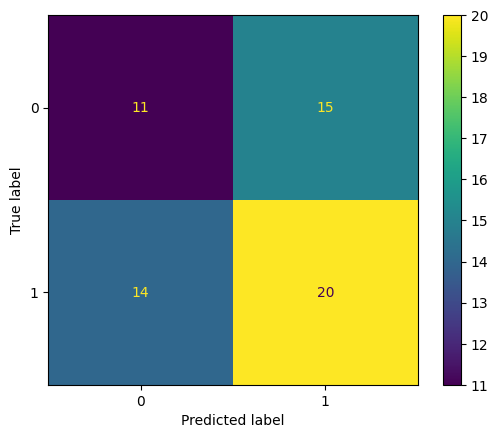


=== Student Classification: MLP Classifier ===
Accuracy: 0.55
Precision: 0.6
Recall: 0.6176470588235294
F1 Score: 0.6086956521739131


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


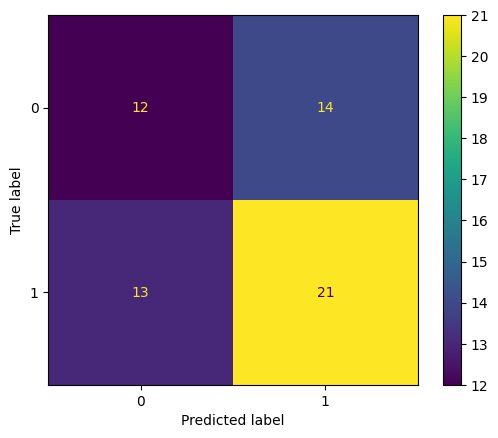

In [14]:
# --- STUDENT CLASSIFICATION MODELS ---
print("\n=== Student Classification: Logistic Regression ===")
logreg2 = LogisticRegression(max_iter=1000)
logreg2.fit(X_train_st_c, y_train_st_c)
evaluate_classifier(logreg2, X_test_st_c, y_test_st_c)

print("\n=== Student Classification: k-NN Classifier ===")
knn_c2 = KNeighborsClassifier(n_neighbors=5)
knn_c2.fit(X_train_st_c, y_train_st_c)
evaluate_classifier(knn_c2, X_test_st_c, y_test_st_c)

print("\n=== Student Classification: MLP Classifier ===")
mlp_c2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
mlp_c2.fit(X_train_st_c, y_train_st_c)
evaluate_classifier(mlp_c2, X_test_st_c, y_test_st_c)

In [15]:
# --- STUDENT REGRESSION MODELS ---
print("\n=== Student Regression: Linear Regression ===")
linreg2 = LinearRegression()
linreg2.fit(X_train_st_r, y_train_st_r)
evaluate_regressor(linreg2, X_test_st_r, y_test_st_r)

print("\n=== Student Regression: k-NN Regressor ===")
knn_r2 = KNeighborsRegressor(n_neighbors=5)
knn_r2.fit(X_train_st_r, y_train_st_r)
evaluate_regressor(knn_r2, X_test_st_r, y_test_st_r)

print("\n=== Student Regression: MLP Regressor ===")
mlp_r2 = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500)
mlp_r2.fit(X_train_st_r, y_train_st_r)
evaluate_regressor(mlp_r2, X_test_st_r, y_test_st_r)


=== Student Regression: Linear Regression ===
MSE: 34.52155729079215
RMSE: 5.87550485412038
MAE: 5.228738881878302
R2 Score: -0.13546341510677617

=== Student Regression: k-NN Regressor ===
MSE: 36.205333333333336
RMSE: 6.0170867812699305
MAE: 5.086666666666667
R2 Score: -0.19084521840823765

=== Student Regression: MLP Regressor ===
MSE: 36.172013984393374
RMSE: 6.014317416331913
MAE: 5.330924946232835
R2 Score: -0.18974929734599177


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
